# Capstone 2 Step 3 Exploratory Data Analysis

The following is the Exploratory Data Analysis phase of capstone 2. In this exercise, data profiles and plots, including a relationship plot and a data correlation plots are created. K-means clustering is implemented, and the updated dataframe is saved as a CSV file. 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Loading the necessary packages </font>**

In [597]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [598]:
df=pd.read_csv('./data/DataWrangling_output.csv',index_col=0)

In [599]:
df.head()

,Wind Speed (m/s),Real Power (kW),Wind Direction (⁰),Ambient Temperature (⁰C),Wind Speed 125.9m (m/s),Wind Speed 101.5m (m/s),Wind Speed 76.7m (m/s),Wind Speed 51.5m (m/s),Wind Speed 27.1m (m/s),Wind Speed 7.3m (m/s),...,Air Temp 51.5m (⁰C),Air Temp 27.1m (⁰C),Air Temp 7.3m (⁰C),Relative Humidity 125.9m (%),Relative Humidity 101.5m (%),Relative Humidity 76.7m (%),Relative Humidity 51.5m (%),Relative Humidity 27.1m (%),Relative Humidty 7.3m (%),Barometric Pressure (mbar)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-08-19 01:00:00,5.67,215,238.2,21.4,5.484,5.312,5.300,3.666,2.624,1.964,...,20.96,20.65,20.27,53.26,52.77,54.94,55.61,58.44,0.694,975.1133
2012-08-19 01:00:01,5.68,217,238.4,21.4,5.381,5.290,5.485,3.746,2.746,1.987,...,20.96,20.65,20.27,53.31,52.66,54.86,55.58,58.42,0.694,975.1301
2012-08-19 01:00:02,5.68,233,238.9,21.4,5.362,5.153,5.393,3.768,2.725,2.026,...,20.96,20.65,20.27,53.27,52.62,54.72,55.65,58.41,0.694,975.0801
2012-08-19 01:00:03,5.68,212,238.9,21.4,5.487,5.159,5.393,3.860,2.740,1.991,...,20.96,20.65,20.27,53.37,52.72,54.74,55.65,58.41,0.694,975.2135
2012-08-19 01:00:04,5.68,213,239.0,21.4,5.623,5.116,5.439,3.873,2.840,2.000,...,20.96,20.65,20.27,53.36,52.69,54.77,55.68,58.44,0.694,974.9967


# Data profile tables and plots 

In [600]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wind Speed (m/s),14404.0,8.715351,2.992834,4.820000,6.070000,7.520000,11.050000,16.390000
Real Power (kW),14404.0,1128.289711,844.366935,199.000000,343.000000,600.000000,1983.000000,2660.000000
Wind Direction (⁰),14404.0,261.044495,67.072592,0.000000,194.100000,248.700000,293.600000,359.900000
Ambient Temperature (⁰C),14404.0,5.857734,18.709044,-20.400000,-9.225000,7.950000,22.375000,26.900000
Wind Speed 125.9m (m/s),14404.0,9.339874,3.449773,5.089000,6.278000,7.120000,12.460000,19.220000
Wind Speed 101.5m (m/s),14404.0,8.262605,2.846073,4.375000,5.850750,7.002000,10.670000,18.290000
Wind Speed 76.7m (m/s),14404.0,7.845281,2.533546,3.960000,5.809000,6.825000,9.880000,18.240000
Wind Speed 51.5m (m/s),14404.0,6.484349,2.540139,3.052000,4.507000,5.457000,8.180000,18.230000
Wind Speed 27.1m (m/s),14404.0,5.678043,3.273516,2.284000,3.170000,4.056000,7.683250,18.670000
Wind Speed 7.3m (m/s),14404.0,4.661370,3.527867,1.297000,2.042000,2.683000,6.779250,17.350000


**<font color='teal'> Plotting histograms  to review the range and density of values for each numeric feature in the dataset and to build data profiles. </font>**

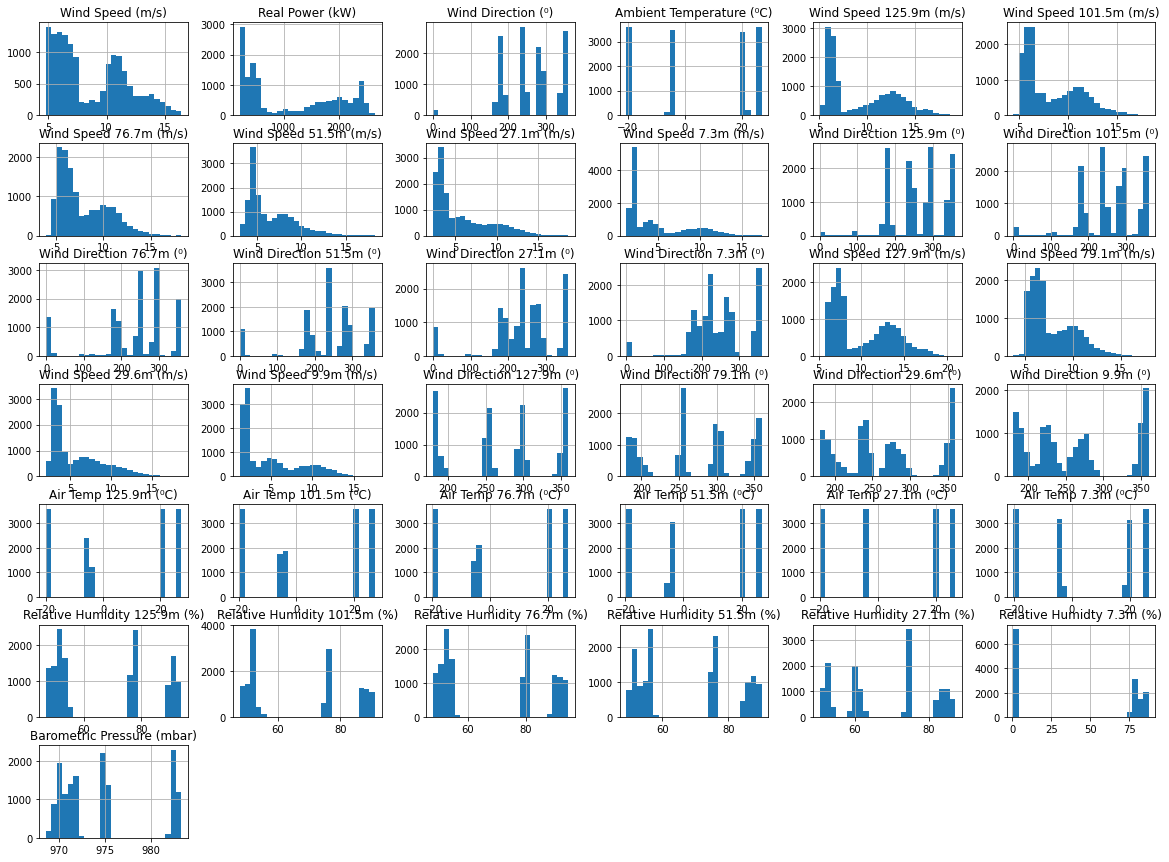

In [601]:
hist=df.hist(bins=25,figsize=[20,15])

The 4 modes for temperature may correspond to data from 4 distinct time periods. The histogram is re-plotted for 4 distinct days to understand distribution changes between the days. The final analysis will be conducted on all the data to get a robust model.

Type of index is checked to confirm it is Datetime type.

In [602]:
type(df.index)

pandas.core.indexes.base.Index

Since it is not Datetime it is converted to datetime.

In [603]:
df.index = pd.to_datetime(df.index)

Index type is checked again.

In [604]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [605]:
df_high_summer=df['08-24-2012']
df_high_summer.tail()

,Wind Speed (m/s),Real Power (kW),Wind Direction (⁰),Ambient Temperature (⁰C),Wind Speed 125.9m (m/s),Wind Speed 101.5m (m/s),Wind Speed 76.7m (m/s),Wind Speed 51.5m (m/s),Wind Speed 27.1m (m/s),Wind Speed 7.3m (m/s),...,Air Temp 51.5m (⁰C),Air Temp 27.1m (⁰C),Air Temp 7.3m (⁰C),Relative Humidity 125.9m (%),Relative Humidity 101.5m (%),Relative Humidity 76.7m (%),Relative Humidity 51.5m (%),Relative Humidity 27.1m (%),Relative Humidty 7.3m (%),Barometric Pressure (mbar)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-08-24 02:59:56,10.29,1276,193.8,26.5,10.77,9.44,8.63,8.270,6.097,4.491,...,26.47,26.41,26.14,49.70,49.80,49.85,50.25,51.73,0.711,970.2611
2012-08-24 02:59:57,10.27,1296,193.7,26.5,10.68,10.40,8.44,7.354,6.166,4.423,...,26.47,26.41,26.14,49.84,49.82,49.87,50.30,51.63,0.694,970.2444
2012-08-24 02:59:58,10.26,1288,193.7,26.5,10.78,10.12,8.67,6.912,6.332,4.302,...,26.47,26.41,26.15,49.80,49.89,49.77,50.30,51.49,0.711,970.3778
2012-08-24 02:59:59,10.22,1303,193.0,26.5,10.41,10.67,8.72,6.647,6.378,4.320,...,26.47,26.41,26.15,49.84,49.85,49.82,50.34,51.20,0.711,970.3945
2012-08-24 03:00:00,10.21,1304,192.4,26.5,10.40,10.76,8.44,6.811,6.239,4.608,...,26.47,26.41,26.15,49.87,49.89,49.97,50.34,51.08,0.711,970.3778


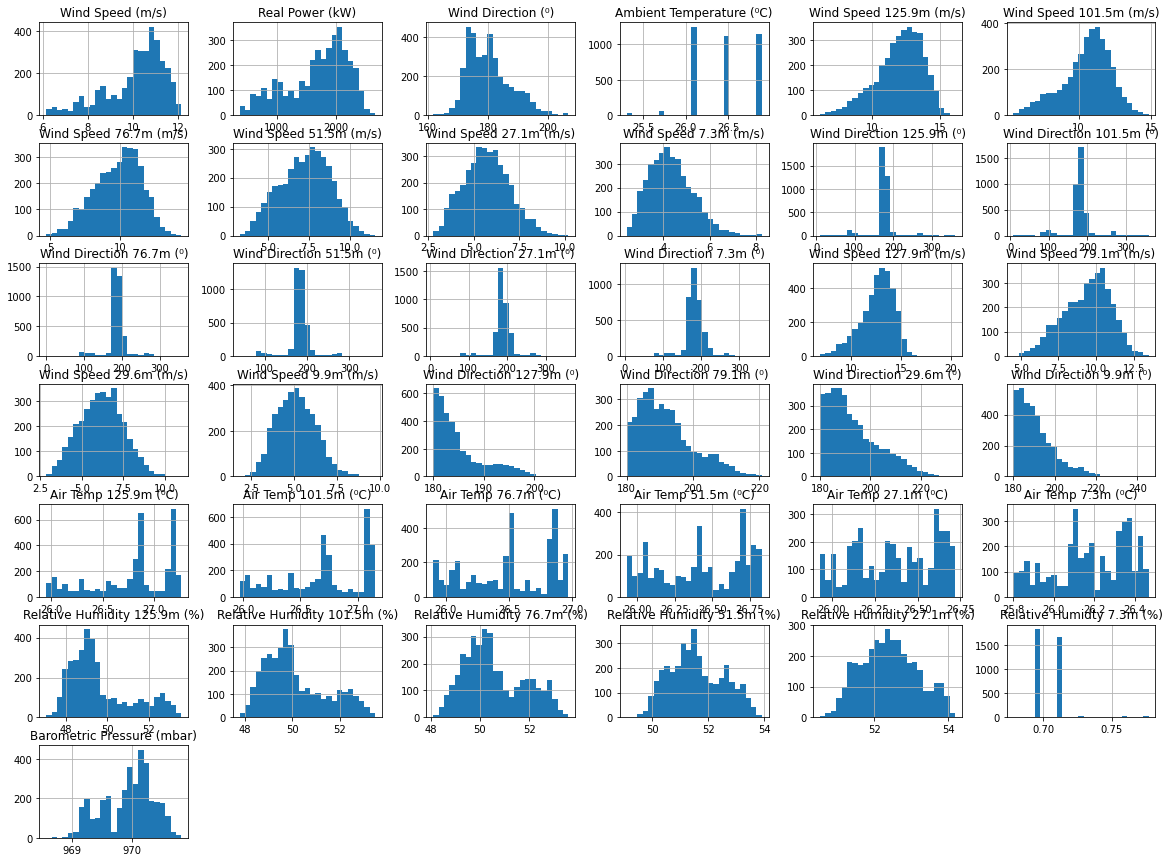

In [606]:
hist=df_high_summer.hist(bins=25,figsize=[20,15])

The histogram shows a distribution for most variables around a single peak. This is reasonable since 1-hour data on a specific day is being visualized. The wind speed at higher elevations has more high speed observations as expected. 

Similar plots are made for the remaining 3 time periods to look for any anomalies.

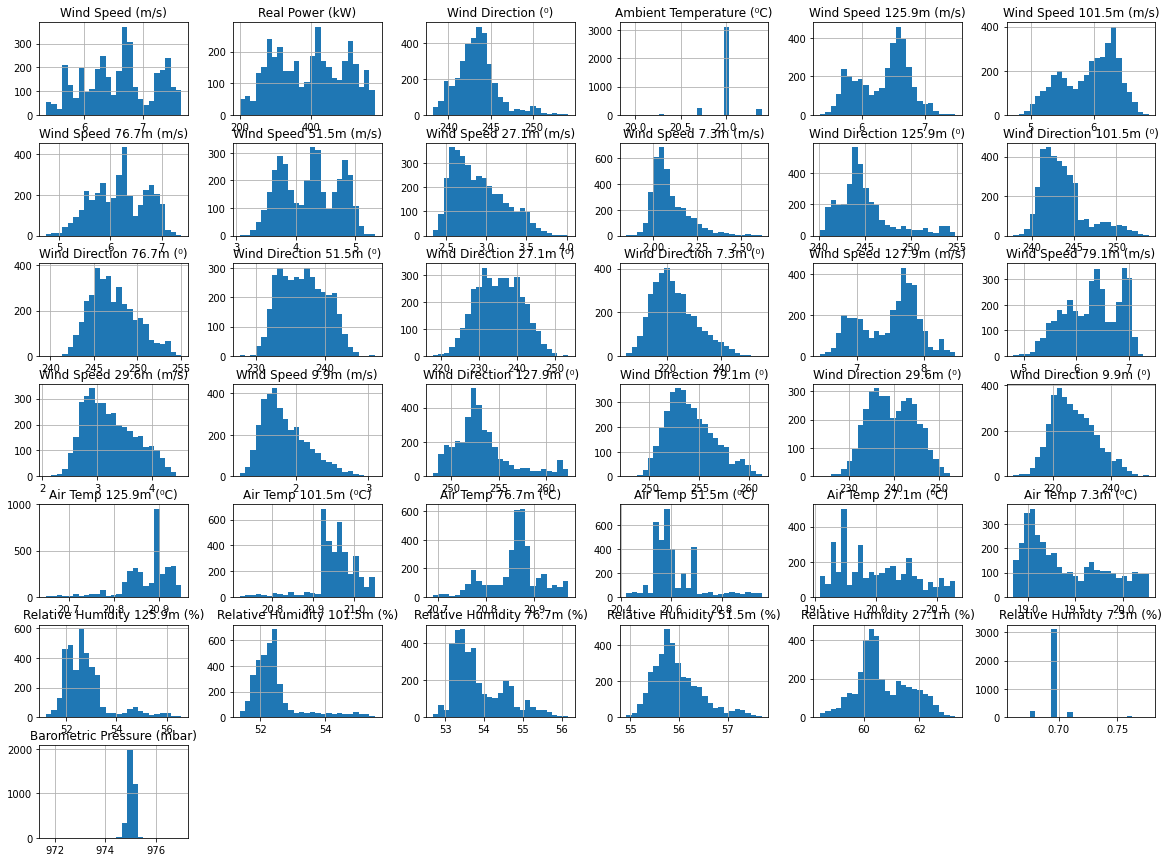

In [607]:
df_low_summer=df['08-19-2012']
hist=df_low_summer.hist(bins=25,figsize=[20,15])

The low wind speed data has more apparent individual distribution variance compared to high wind. Further, wind speed distributions appear to be distinct at various heights as well. 

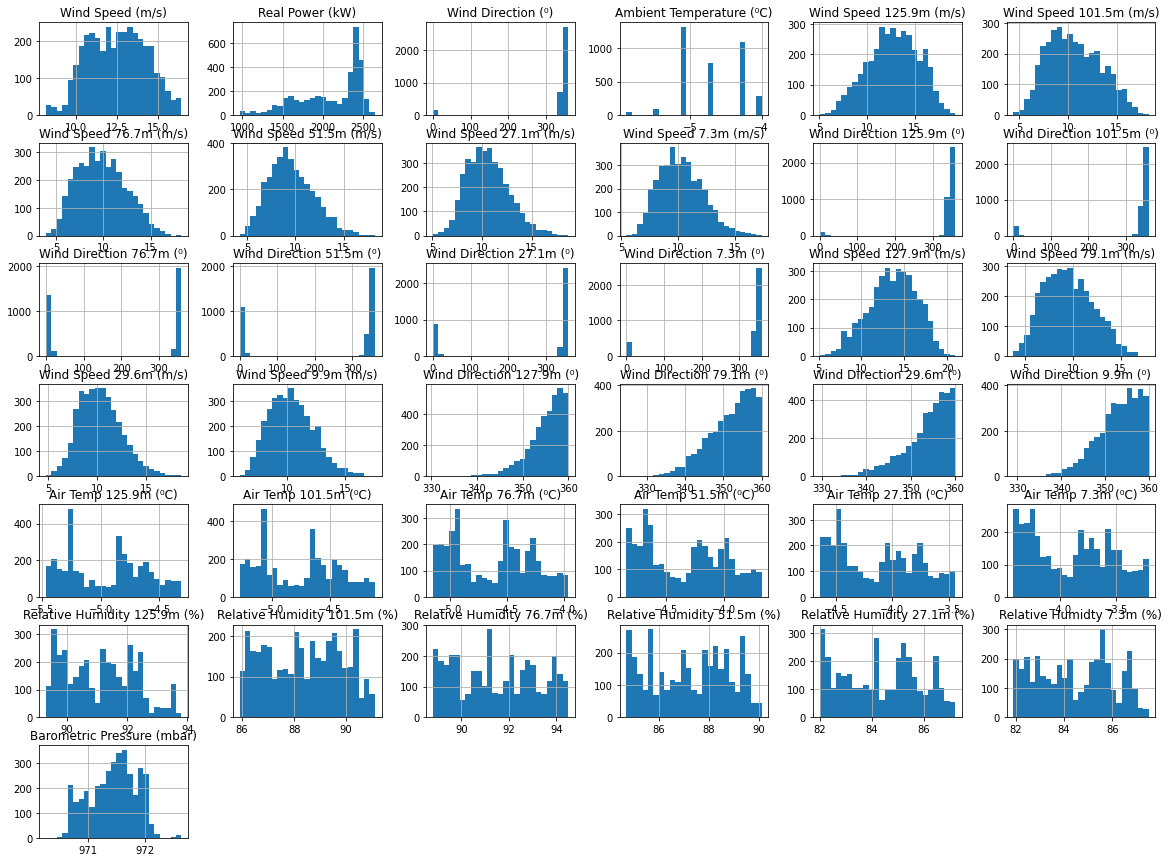

In [608]:
df_high_winter=df['12-29-2013']
hist=df_high_winter.hist(bins=25,figsize=[20,15])

The power distribution for the above timeperiod does not seem to correspond to wind data in a manner as seen in the previous 2 timeperiods. Perhaps the turbine was operated differently, and power generation was limited due to it reaching its rated capacity in high winds.

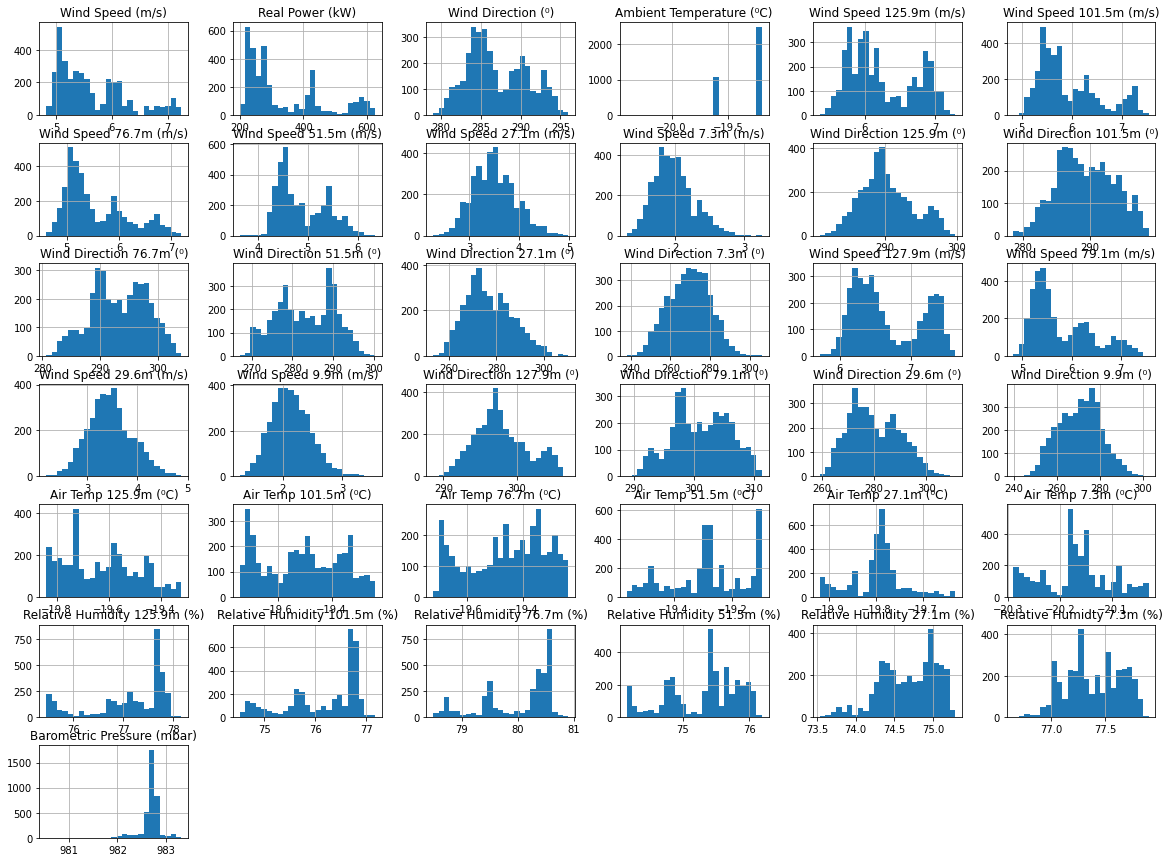

In [609]:
df_low_winter=df['01-08-2014']
hist=df_low_winter.hist(bins=25,figsize=[20,15])

The power distribution for the above timeperiod seems to correspond to wind data, however the power magnitude is low. Perhaps the temperature has a role to play during winter time. Regardless, the distributions for individual time period and also entirety of the data seem reasonable.

## Anamolies & outliers - review boxplots

**<font color='teal'> Boxplot for every column is given below for the entire data set.</font>**

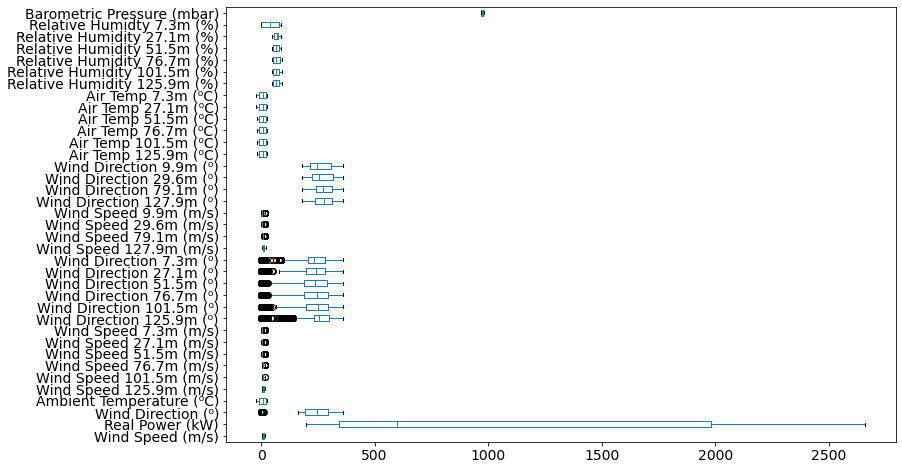

In [610]:
boxplot = df.boxplot(grid=False, vert=False,figsize=[12,8],fontsize=14)

The box plot do not show any outliers in any columns. Note: For wind direction: 0 deg. represents wind from the north similar to 360 deg. 0 deg. is not an outlier. 

# Exploring data relationships 

<font color='teal'>**Creating pairplots, or what is commonly referred to as biplots.**</font>

In [611]:
df.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 125.9m (m/s)',
       'Wind Speed 101.5m (m/s)', 'Wind Speed 76.7m (m/s)',
       'Wind Speed 51.5m (m/s)', 'Wind Speed 27.1m (m/s)',
       'Wind Speed 7.3m (m/s)', 'Wind Direction 125.9m (⁰)',
       'Wind Direction 101.5m (⁰)', 'Wind Direction 76.7m (⁰)',
       'Wind Direction 51.5m (⁰)', 'Wind Direction 27.1m (⁰)',
       'Wind Direction 7.3m (⁰)', 'Wind Speed 127.9m (m/s)',
       'Wind Speed 79.1m (m/s)', 'Wind Speed 29.6m (m/s)',
       'Wind Speed 9.9m (m/s)', 'Wind Direction 127.9m (⁰)',
       'Wind Direction 79.1m (⁰)', 'Wind Direction 29.6m (⁰)',
       'Wind Direction 9.9m (⁰)', 'Air Temp 125.9m (⁰C)',
       'Air Temp 101.5m (⁰C)', 'Air Temp 76.7m (⁰C)', 'Air Temp 51.5m (⁰C)',
       'Air Temp 27.1m (⁰C)', 'Air Temp 7.3m (⁰C)',
       'Relative Humidity 125.9m (%)', 'Relative Humidity 101.5m (%)',
       'Relative Humidity 76.7m (%)', 'Relative Humidity 51.5

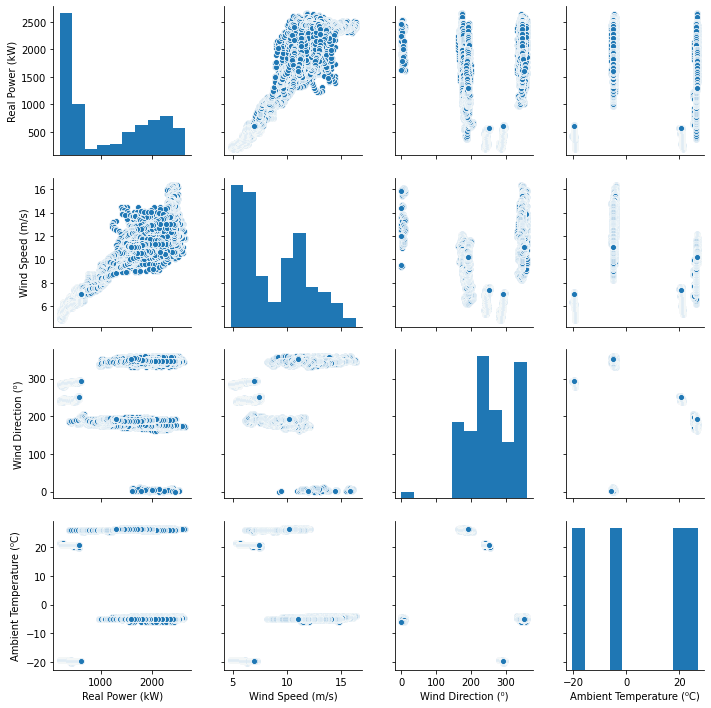

In [612]:
sns.pairplot(df,vars=['Real Power (kW)','Wind Speed (m/s)','Wind Direction (⁰)','Ambient Temperature (⁰C)'])

Significant correlation is observed between Rated Power and nacelle Wind speed as expected. Although, the relationship seems 'noisier' than expected. Power does not seem to correlate with temperature or wind direction.

Similar plots are created to correlated power to upstream measurements at hub height.

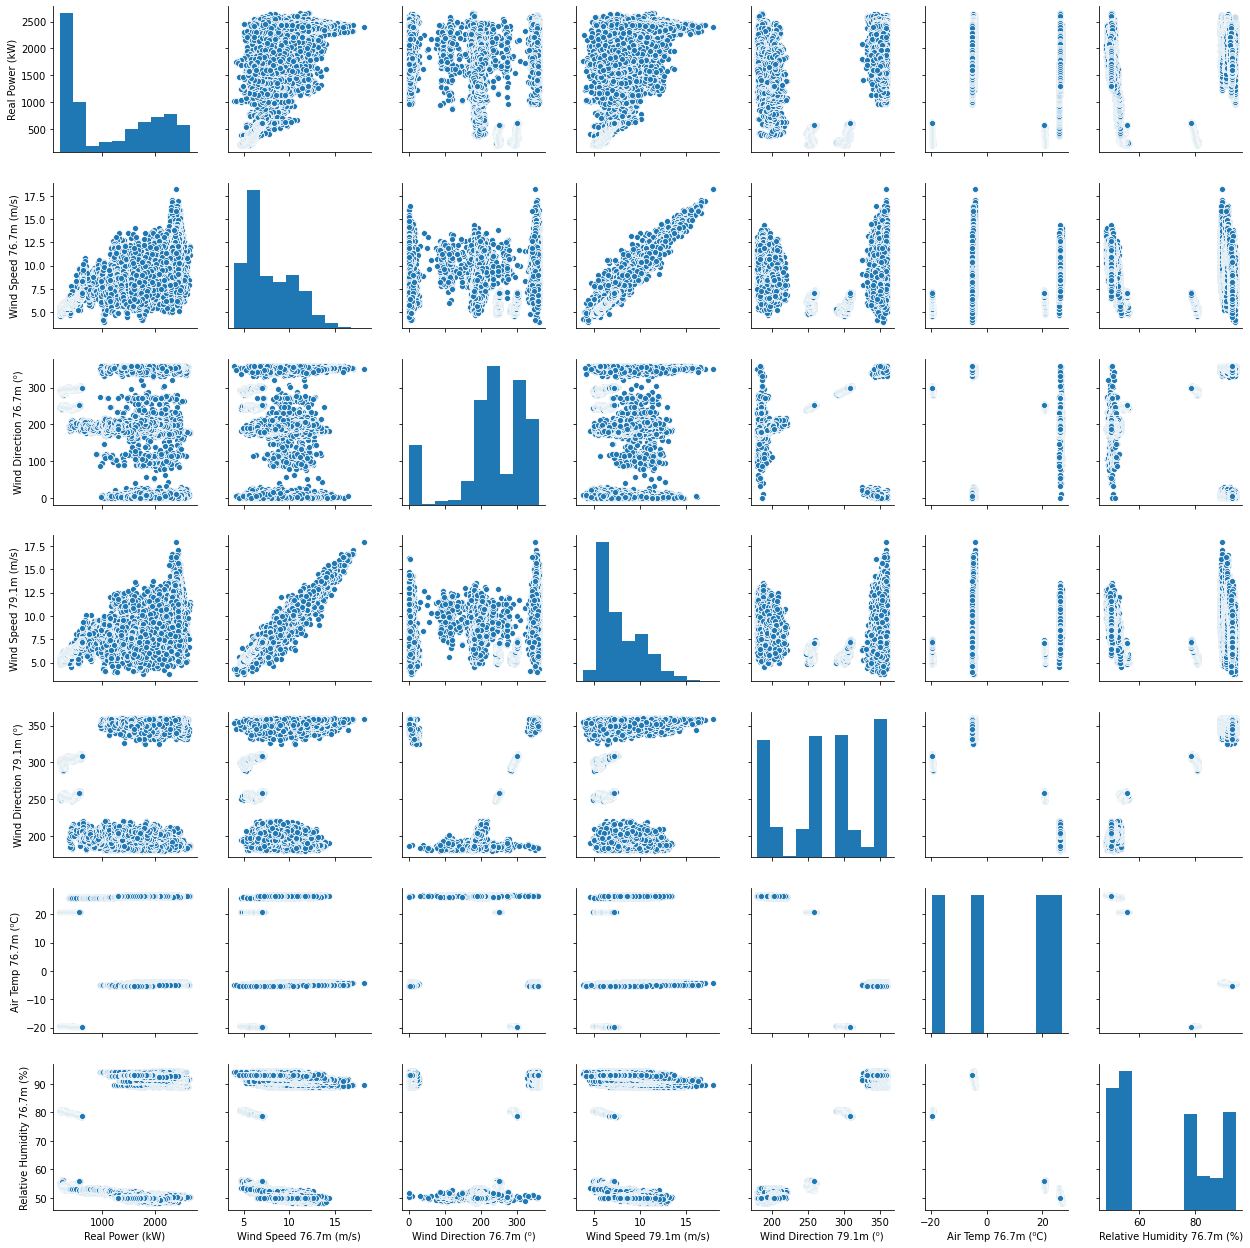

In [613]:
sns.pairplot(df,vars=['Real Power (kW)','Wind Speed 76.7m (m/s)','Wind Direction 76.7m (⁰)','Wind Speed 79.1m (m/s)', 'Wind Direction 79.1m (⁰)', 'Air Temp 76.7m (⁰C)','Relative Humidity 76.7m (%)'])

Again, some correlation is apparent between upstream wind speed and power, however, noisier than expected. There is a linear correlation between wind speed measured by wind instruments at same location, as expected.

Pair plots are made again for power and wind speed measured at the nacelle as well as upstream location. 

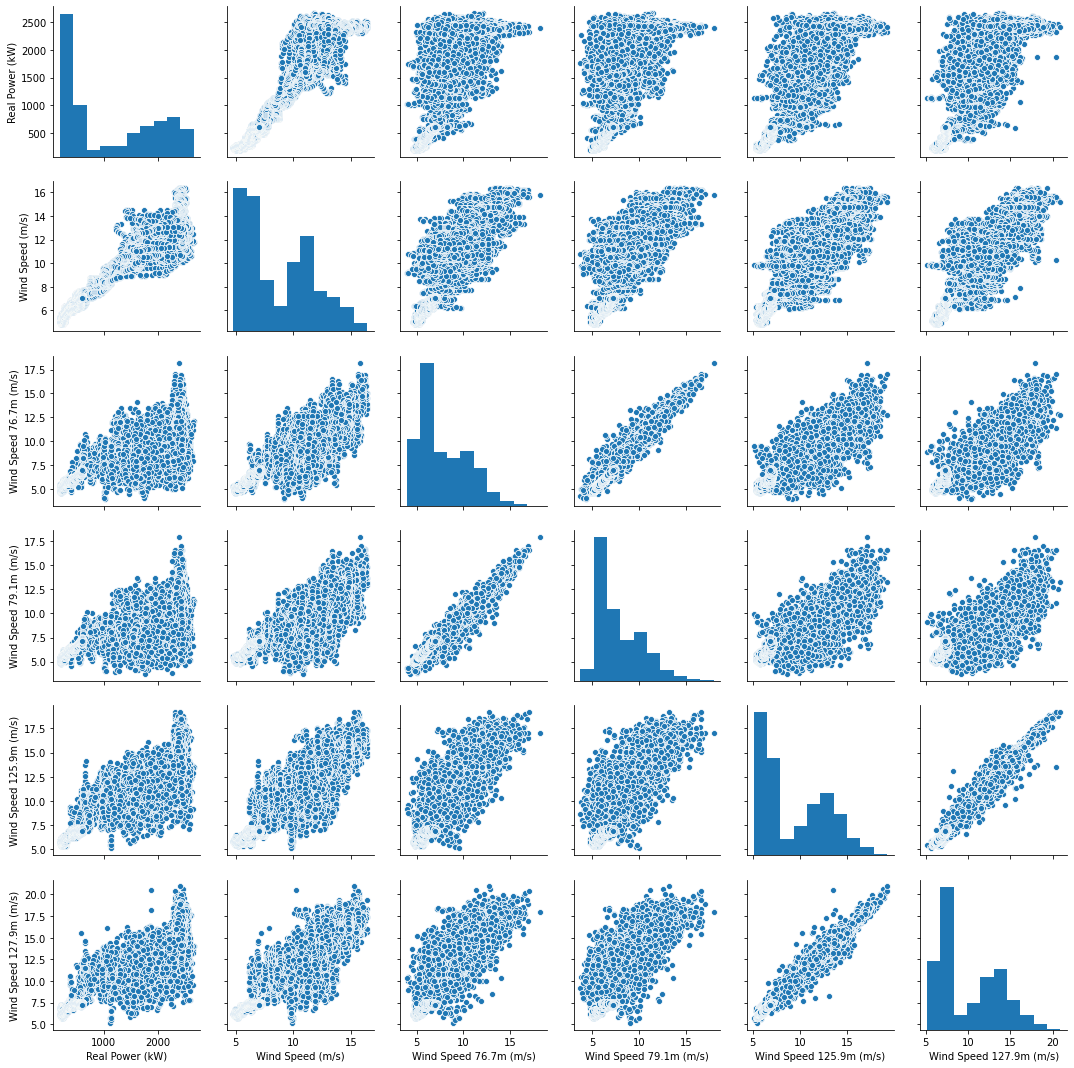

In [614]:
sns.pairplot(df,vars=['Real Power (kW)','Wind Speed (m/s)','Wind Speed 76.7m (m/s)','Wind Speed 79.1m (m/s)', 'Wind Speed 125.9m (m/s)','Wind Speed 127.9m (m/s)'])

The correlation between power and wind speed seem to exists, and is highest with nacelle measured speed. Interestingly, correlation is not as high as expected for speed measured between different heights. Perhaps a 1-minute average data may be less noisy, however this will be confirmed through some more analysis.

# Identification and creation of features

The relationship between turbine power, $P$ (Watts, W), and inflow speed, $U$ (m/s), is given by the following expression:

<div style="text-align: center"> $P=\frac{1}{2}C_p\rho AU^3$     $\hspace{4em}$    eq. 1, </div>  
where, $A=\frac{\pi}{4}D^2=\frac{\pi}{4}\times (96 m)^2= 7.24\times 10^{3} m^2$ is the turbine rotor area, $C_p$ is the turbine performance coefficient limited by the Betz limit that states maximum $C_p=16/27$, and $\rho$ is the air density (kg/m$^3$). Although, several simplification assumptions, such as homogenity of $U$, have been made to arrive at this equation, it is an accepted expression for estimating turbine power.

To enable use of OLS and other potential linear models the following modification for eq.1 is considered.
<div style="text-align: center"> $log_{10}(P)=log_{10}(\frac{1}{2})+log_{10}(C_p)+log_{10}(\rho)+ log_{10}(A)+3\times log_{10}(U)$     $\hspace{4em}$    eq. 2. </div> 
Here a constant $\kappa_1$ can be defined such that:
<div style="text-align: center"> $\kappa_1=log_{10}(\frac{1}{2})+log_{10}(C_p)+log_{10}(A)$     $\hspace{4em}$    eq. 3. </div> 
Finally, eq. 1 can be written as:
<div style="text-align: center"> $log_{10}(P)=\kappa_1+log_{10}(\rho)+ 3\times log_{10}(U)$     $\hspace{4em}$    eq. 4. </div> 
For example, the numerical value of $\kappa_1\sim\pi$, if $C_p=0.4$ for the turbine under consideration.


Further, $\rho$ can be estimated using the following expression:
<div style="text-align: center"> $\rho=0.0035\frac{p}{T}$     $\hspace{4em}$    eq. 5, </div> 
where, $p$ is pressure (in Pascals Pa), $T$ is temperature (in $^{\circ}$K). The effects of humidity on air density are neglected.
Following similar modification above eq. 5 can be modified to obtain:
<div style="text-align: center"> $log_{10}(\rho)=log_{10}0.0035+log_{10}p-log_{10}T$     $\hspace{4em}$    eq. 6. </div> 

Based on eq. 6, eq. 4 can be further updated as follows:
<div style="text-align: center"> $log_{10}(P)=\kappa_2+log_{10}p-log_{10}T+ 3\times log_{10}(U)$     $\hspace{4em}$    eq. 7, </div> 
where, $\kappa_2=\kappa_1+log_{10}0.0035\sim 0.7$ (for $\kappa_1\sim\pi$).


<font color='teal'>**Eq. 1, 5, 6, \& 7 that are simplified, physics-based models are tested below.**</font>

In [615]:
#Since wind turbine power is artificially limited to rated value at higher wind speeds data above rated values is not considered for analysis below.
df_test1=df.loc[df['Wind Speed (m/s)']<12 ]
df_test=df_test1.loc[df['Real Power (kW)']<2500 ]

In [616]:
# Measurements at the wind turbine nacelle are first considered.
x_test_array=np.array(df_test[['Wind Speed (m/s)', 'Ambient Temperature (⁰C)', 'Barometric Pressure (mbar)']].values)

In [617]:
y_test_array=np.array(df_test[['Real Power (kW)']].values)[:,0]

In [618]:
#from eq. 5
#Note: pressure is multiplied by 100 to convert mbar to Pa
#Note: 273 is added to temperature to convert C to K

density_estimate=0.0035*(x_test_array[:,2]*100)/(x_test_array[:,1]+273)

Text(0, 0.5, 'Density Estimate (kg/m$^3$)')

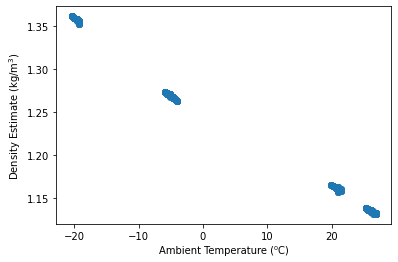

In [619]:
plt.scatter(x_test_array[:,1],density_estimate)
plt.xlabel('Ambient Temperature (⁰C)')
plt.ylabel('Density Estimate (kg/m$^3$)')

The density-temperature variation is as expected, since estimated density is inversely proportional to the temperature.

Estimating power using eq. 1 below for several trial $C_p$ values to achieve best fit. 

In [620]:
cp_array= np.arange(0.3, 0.59, 0.01)
P_est=[]
count=0
vect_adj_R2=[]


for cp in cp_array:
    #from eq. 1
    #1/1000 factor multiplication to convert W to kW 
    P_line=(1/1000)*1/2*cp*np.array(density_estimate)*7.24e3*(np.array(x_test_array[:,0])**3) 
    
    P_est.append(P_line)
    count=count+1
    #estimating  adj_R2
    R2=1-((1/len(P_line))*np.sum(np.power((y_test_array-np.array(P_line)),2))/np.var(y_test_array))
    adj_R2=1-((1-R2)*(len(P_line)-1)/(len(P_line)-3-1))
    vect_adj_R2.append(adj_R2)
    
P_est_np=np.array(P_est)



The best for eq. 1 is achieved with Cp= 0.34


Text(0, 0.5, 'Adjusted R$^2$')

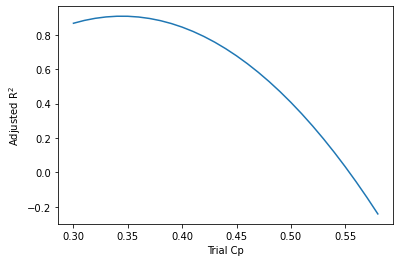

In [621]:
#estimating max adj_R2 position
maxpos = vect_adj_R2.index(max(vect_adj_R2)) 
print('The best for eq. 1 is achieved with Cp=', cp_array[maxpos])

plt.plot(cp_array,vect_adj_R2)
plt.xlabel('Trial Cp')
plt.ylabel('Adjusted R$^2$')

$Cp=0.34$ although lower than the earlier assumed 0.4 is still reasonable.

In [622]:
P_phy_model_optCp=(1/1000)*1/2*0.34*np.array(density_estimate)*7.24e3*(np.array(x_test_array[:,0])**3) 

Text(0, 0.5, 'Estimated Power (kW)')

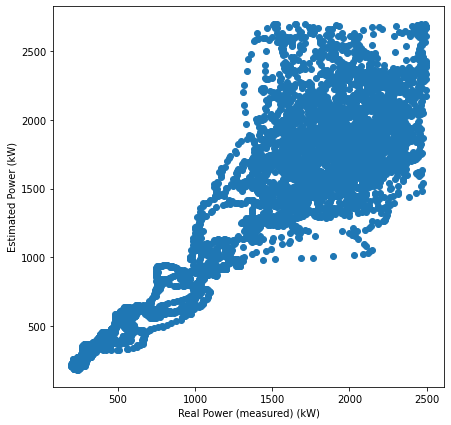

In [623]:
plt.figure(figsize=(7,7))
plt.scatter(y_test_array,P_phy_model_optCp)
plt.xlabel('Real Power (measured) (kW)')
plt.ylabel('Estimated Power (kW)')
#plt.legend(['Physics Model','Filtered Measured Data'])

Power estimates seem to correspond with measured values. However, there are significant differences at $P>1500$kW.

To simplify visualization density is substituted by an average value for the analysis below.

In [624]:
speed_array= np.arange(4, 12, 0.1)
P_phy_model=(1/1000)*1/2*0.34*np.mean(density_estimate)*7.24e3*(speed_array**3) 

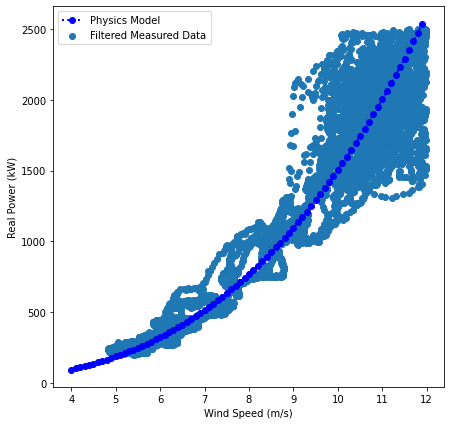

In [625]:
plt.figure(figsize=(7,7))
plt.plot(speed_array,P_phy_model,'bo:',linewidth=2)
plt.scatter(x_test_array[:,0],y_test_array)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Real Power (kW)')
plt.legend(['Physics Model','Filtered Measured Data'])


The best-fit from the physics-based model seems to fit the data well. However, the Adjusted R2 is 0.91 could be perhaps improved using machine learning algorithm. Further, data points beyond rated power were removed during the fitting process. The plot below shows the physics-based model with all data.

In [626]:
speed_array= np.arange(4, 13, 0.1)
speed_array=np.append(speed_array, 14)
P_phy_model=(1/1000)*1/2*0.34*np.mean(density_estimate)*7.24e3*(speed_array**3) 

In [627]:
speed_array2= np.arange(12, 16.5, 0.1)

P_phy_model2=2500*np.ones(len(speed_array2)) 

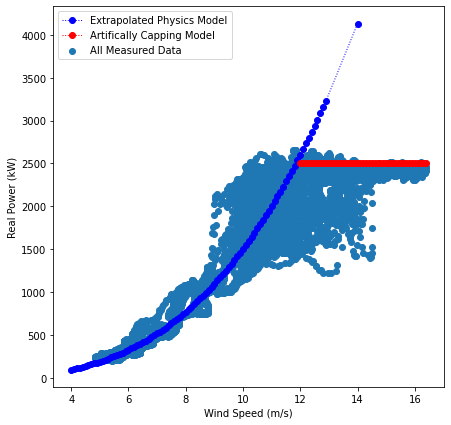

In [628]:
plt.figure(figsize=(7,7))
plt.plot(speed_array,P_phy_model,'bo:',linewidth=1)
plt.plot(speed_array2,P_phy_model2,'ro:',linewidth=1)
plt.scatter(df['Wind Speed (m/s)'],df['Real Power (kW)'])
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Real Power (kW)')
plt.legend(['Extrapolated Physics Model','Artifically Capping Model','All Measured Data'])

The physics-based model significantly deviates from the measured values even for a modest increase in wind speed relative to the rated value (12 m/s assumed in this case) justifying further machine learning model development. This holds true even when the model values are delibrately capped at rated power (shown using the RED line). The variability is high at high wind speeds (10 m/s).

It can be argued that the model-data differences could be due to effects associated with short time scales of measurements. The measured data frequency of 1 Hz is high as per industry standards. Below the above exercise is repeated with 10-minute-averaged data.

<font color='teal'>**Eq. 1, 5, 6, \& 7 that are simplified, physics-based models are tested below with 10-minute averaged data.**</font>

In [629]:
df_10min=df.resample('10T').mean()
df_10min.dropna(inplace=True)

[0.33, 0.9251127538293397]

<Figure size 720x504 with 0 Axes>

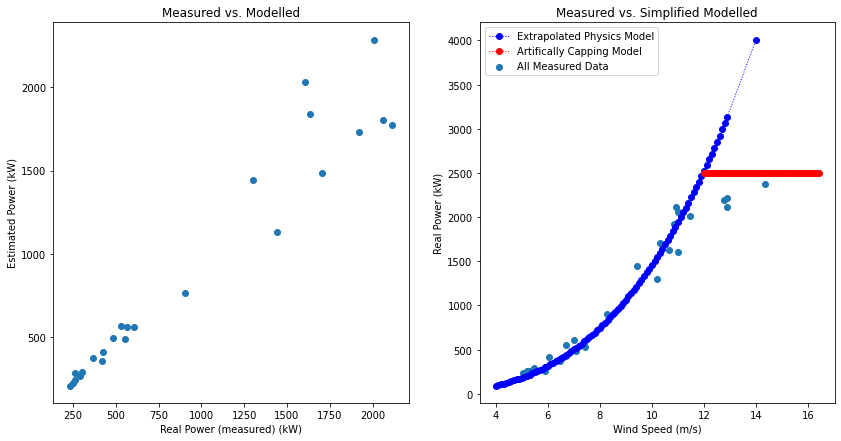

<Figure size 504x504 with 0 Axes>

In [630]:
def verifier(df): 
    df_test1=df.loc[df['Wind Speed (m/s)']<12 ] 
    df_test=df_test1.loc[df['Real Power (kW)']<2500 ]
    x_test_array=np.array(df_test[['Wind Speed (m/s)', 'Ambient Temperature (⁰C)', 'Barometric Pressure (mbar)']].values)
    y_test_array=np.array(df_test[['Real Power (kW)']].values)[:,0]
    
    #from eq. 5
    #Note: pressure is multiplied by 100 to convert mbar to Pa
    #Note: 273 is added to temperature to convert C to K
    
    density_estimate=0.0035*(x_test_array[:,2]*100)/(x_test_array[:,1]+273)
    cp_array= np.arange(0.3, 0.59, 0.01)
    P_est=[]
    count=0
    vect_adj_R2=[]
    
    for cp in cp_array:
        #from eq. 1
        #1/1000 factor multiplication to convert W to kW 
        P_line=(1/1000)*1/2*cp*np.array(density_estimate)*7.24e3*(np.array(x_test_array[:,0])**3) 
        P_est.append(P_line)
        count=count+1
        #estimating  adj_R2
        R2=1-((1/len(P_line))*np.sum(np.power((y_test_array-np.array(P_line)),2))/np.var(y_test_array))
        adj_R2=1-((1-R2)*(len(P_line)-1)/(len(P_line)-3-1))
        vect_adj_R2.append(adj_R2)
        
        P_est_np=np.array(P_est)
        
        maxpos = vect_adj_R2.index(max(vect_adj_R2))
        
        
        
    P_phy_model_optCp=(1/1000)*1/2*cp_array[maxpos]*np.array(density_estimate)*7.24e3*(np.array(x_test_array[:,0])**3) 
    
    plt.figure(figsize=(10,7))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,7))
    ax1.scatter(y_test_array,P_phy_model_optCp)
    ax1.set(xlabel='Real Power (measured) (kW)', ylabel='Estimated Power (kW)', title='Measured vs. Modelled')
    
    speed_array= np.arange(4, 13, 0.1)
    speed_array=np.append(speed_array, 14)
    P_phy_model=(1/1000)*1/2*cp_array[maxpos]*np.mean(density_estimate)*7.24e3*(speed_array**3) 
    speed_array2= np.arange(12, 16.5, 0.1)
    P_phy_model2=2500*np.ones(len(speed_array2)) 
    
    plt.figure(figsize=(7,7))
    ax2.plot(speed_array,P_phy_model,'bo:',linewidth=1)
    ax2.plot(speed_array2,P_phy_model2,'ro:',linewidth=1)
    ax2.scatter(df['Wind Speed (m/s)'],df['Real Power (kW)'])
    ax2.set(xlabel='Wind Speed (m/s)', ylabel='Real Power (kW)', title='Measured vs. Simplified Modelled')
    ax2.legend(['Extrapolated Physics Model','Artifically Capping Model','All Measured Data'])
    
    
    output=[cp_array[maxpos], vect_adj_R2[maxpos]]
    return output
    



    
verifier(df_10min)

The physical-based model best predicts 10-minute averaged power with $C_p=0.33$ and the model $Adj\_R^2=0.93$. Although, $Adj\_R^2$ has improved the model is not satisfactory at high wind speeds (>10 m/s) and has similar issues as high frequency data.

The inadequate physics-based model performance motivates pursuing machine learning modelling. Averaging data improved model performance, however, the 10-minute averaging period may be too long when responding to minute-by-minute grid demand. 1-minute averaging is considered for the subsequent analysis, since, it provides a good balance between avoiding short-timeperiod noise and is quick enough to respond to grid demands on time.

<font color='teal'>**Eq. 1, 5, 6, \& 7 that are simplified, physics-based models are tested below with 1-minute averaged data.**</font>


In [631]:
df_1min=df.resample('1T').mean()
df_1min.dropna(inplace=True) #note resample will add nan's since data is discontineous across days. Note 2: '1Min' is equivalent to '1T'

[0.34, 0.9294280981322836]

<Figure size 720x504 with 0 Axes>

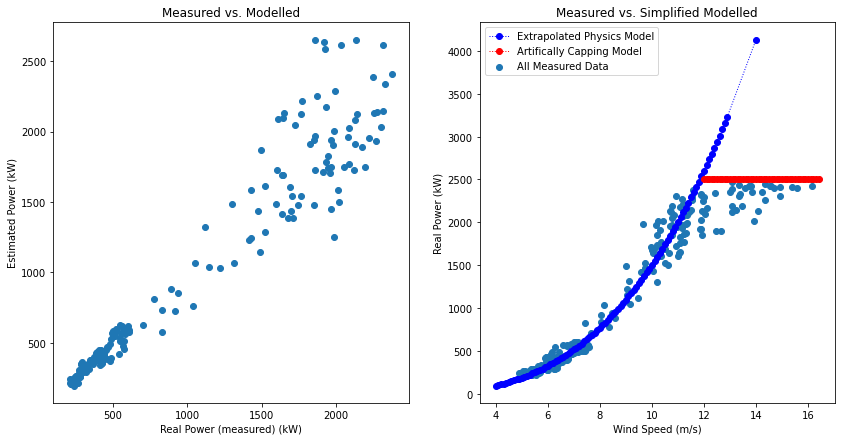

<Figure size 504x504 with 0 Axes>

In [632]:
verifier(df_1min)

The physical-based model best predicts 1-minute averaged power with $C_p=0.34$ and the model $Adj\_R^2=0.93$. The model fitting performance is between when compared to the original data and the 10-minute average data.

For all above data fits, the physical model performance is worse at higher speeds, especially, the transition point between low and rated speed (Region II to Region III). The data used for this study was originally classified for high and low winds, along with winter and summer. To incorporate this information for subsequent modelling, additional categorical features, and are included are created such that 'one-hot-coding, will not be necessary later.

Next, upstream wind data is used to predict the physics-based model performance.

[0.4500000000000001, 0.7554411383529543]

<Figure size 720x504 with 0 Axes>

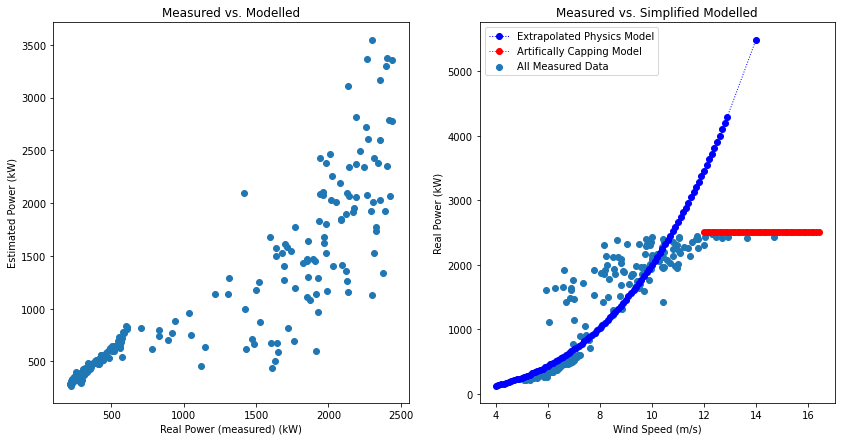

<Figure size 504x504 with 0 Axes>

In [633]:
df_1min_upstream=df_1min

#replacing nacelle measurement with upstream measurement at hub height.
df_1min_upstream['Wind Speed (m/s)']=df_1min_upstream['Wind Speed 79.1m (m/s)']
                                                         
verifier(df_1min_upstream)

The physical-based model best predicts 1-minute averaged power with $C_p=0.45$ and the model $Adj\_R^2=0.76$, when upstream measurements as required by IEC standards are considered in place of the nacelle measurements. The model fitting performance is significantly reduced even for data with wind speed low as 8 m/s. Further, $C_p$ for best fit is different with previous attempt. Such inconsistency makes it difficult to select features and the appropriate model.

In [634]:
def add_catogorical_features(df_1min):
    df_1min['Summer']=np.ones(df_1min.shape[0])
    df_1min['Winter']=np.ones(df_1min.shape[0])
    df_1min['High speed']=np.ones(df_1min.shape[0])
    df_1min['Low speed']=np.ones(df_1min.shape[0])
    
    #low winter
    df_1min['Summer']['01-08-2014']=0
    df_1min['High speed']['01-08-2014']=0
    #high winter
    df_1min['Summer']['2013-12-29']=0
    df_1min['Low speed']['2013-12-29']=0
    #low summer
    df_1min['Winter']['2012-08-19']=0
    df_1min['High speed']['2012-08-19']=0
    #high summer
    df_1min['Winter']['2012-08-24']=0
    df_1min['Low speed']['2012-08-24']=0
    
    return df_1min



<font color='teal'>**Pearson correlation heatmap is created to check for multi-collinearity**</font>

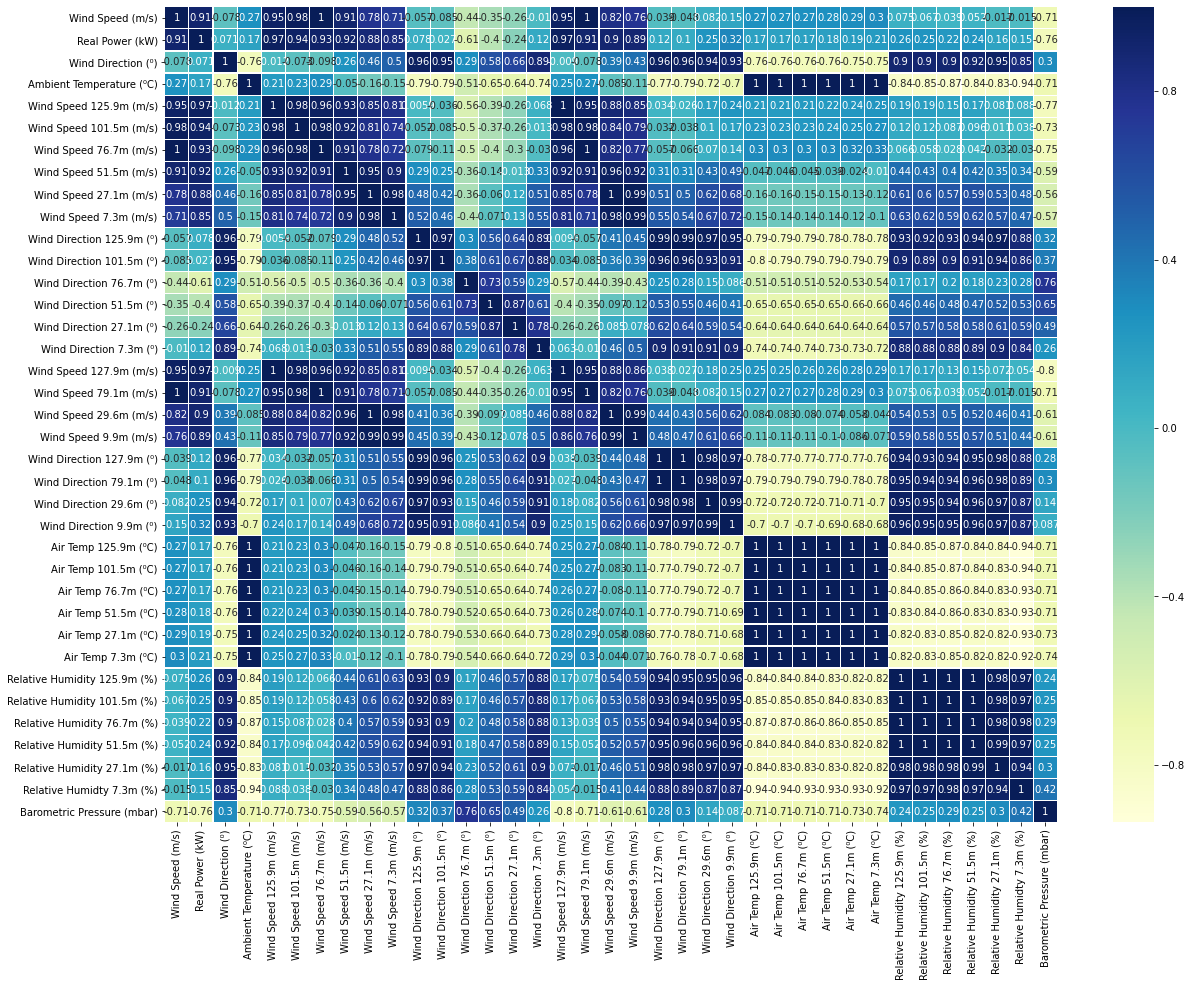

In [635]:
plt.figure(figsize=(20,15))
sns.heatmap(df_1min.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

Based on the above map, several features seem to be highly correlated . However, before dropping correlated explanatory variables, additional features are derived that are critical for wind farm meteorology.


<font color='teal'>**Bulk Richardson Number ($Ri_B$)**</font>

Richardson number, $Ri$, represents the ratio of intertial effects to buoyancy effects in fluid flow. The Bulk Richardson Number ($Ri_B$) is a $Ri$ simplification, done to make measurements practically possible using typically available instruments .For a thin-layer assumption $Ri_B>0.25$ represents a stable atmosphere (typically night time), during which the atmospheric boundary layer is characterized by a significant velocity and temperature gradient with height, and where fluid layers are stratified (heavy fluid to the bottom vs. light fluid on top). This is critical, since turbine power is proportional to cube of velocity. The atmospheric boundary layer is characterized by constant mixed layer for unstable situations (typically daytime), will leading to a difference in power produced when compared to stable situations.  

From Stull 1988, the expression for $Ri_B$ is as follows:

<div style="text-align: center"> $Ri_B=\frac{g\Delta \overline\theta_v \Delta z}{\overline\theta_v \Delta \overline U^2}$     $\hspace{4em}$    eq. 8, </div> 
where, acceleration due to gravity $g=9.81 m/s^2$, virtual potential temperature, $\theta_v$ is given in eq. 9 below ($^\circ C$), speed is $U (m/s)$, and $\Delta$ represents a difference (top value - bottom value).

Virtual potential temperature modifies the temperature measurement such that the effect of pressure and humidity on buoyancy is eliminated. The expression for virtual potential temperature is as follows:
<div style="text-align: center"> $\theta_v=T(1.0+.60q)(\frac{1000}{P})^\gamma $     $\hspace{4em}$    eq. 9, </div> 
where $T$ is temperature in $^\circ K$, $\gamma=0.286$, and P is pressure in mbar. 

Specific humidity, $q$, is obtained using the following equations:
<div style="text-align: center"> $q=0.622(\frac{e}{P}) $     $\hspace{4em}$    eq. 10, </div> 
where, vapor pressure, $e$, can be found using the expression for relative humidity,
<div style="text-align: center"> $RH=100(\frac{e}{e_s}) $     $\hspace{4em}$    eq. 11, </div>
where, saturated vapor pressure:
<div style="text-align: center"> $e_s=e_{so}exp(\frac{l_v}{R_v}(\frac{1}{T_o}-\frac{1}{T})) $     $\hspace{4em}$    eq. 12, </div>
where, reference saturation pressure, $e_{so}=6.11 mbar$ at $T_o=273^\circ K$, latent heat of vaporisation for water, $l_v=2.5\times 10^6 J/kg$, and gas constant for water vapor, $R_v=461.5 J^\circ K/kg$.

$Ri_B$ and gradient terms $\Delta \overline U$, $\Delta \overline\theta_v$, and others across the turbine rotor are estimated below.

In [636]:
df.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 125.9m (m/s)',
       'Wind Speed 101.5m (m/s)', 'Wind Speed 76.7m (m/s)',
       'Wind Speed 51.5m (m/s)', 'Wind Speed 27.1m (m/s)',
       'Wind Speed 7.3m (m/s)', 'Wind Direction 125.9m (⁰)',
       'Wind Direction 101.5m (⁰)', 'Wind Direction 76.7m (⁰)',
       'Wind Direction 51.5m (⁰)', 'Wind Direction 27.1m (⁰)',
       'Wind Direction 7.3m (⁰)', 'Wind Speed 127.9m (m/s)',
       'Wind Speed 79.1m (m/s)', 'Wind Speed 29.6m (m/s)',
       'Wind Speed 9.9m (m/s)', 'Wind Direction 127.9m (⁰)',
       'Wind Direction 79.1m (⁰)', 'Wind Direction 29.6m (⁰)',
       'Wind Direction 9.9m (⁰)', 'Air Temp 125.9m (⁰C)',
       'Air Temp 101.5m (⁰C)', 'Air Temp 76.7m (⁰C)', 'Air Temp 51.5m (⁰C)',
       'Air Temp 27.1m (⁰C)', 'Air Temp 7.3m (⁰C)',
       'Relative Humidity 125.9m (%)', 'Relative Humidity 101.5m (%)',
       'Relative Humidity 76.7m (%)', 'Relative Humidity 51.5

In [637]:
# Wind direction difference is calculated using vector dot product. A simple differene will causee problem for northerly winds where direction differences could be appear large when they are infact very low (eg. difference between 360 and 0 should be 0 and not 360).

def winddir_diff(D1,D2):
    
    u1= -np.sin(D1*np.pi/180.0)
    v1= -np.cos(D1*np.pi/180.0)
    u2= -np.sin(D2*np.pi/180.0)
    v2= -np.cos(D2*np.pi/180.0)
    
    dotprod=np.multiply(u1,u2)+np.multiply(v1,v2)
    
    
    dir_diff=np.arccos(dotprod,np.ones(len(dotprod)))*180.0/np.pi
                       
    return dir_diff;

winddir_diff(np.array([20.0,30.0,90.0, 110.0,350.0,1,170,260,210]),np.array([30.0,40.0,45.0,70.0,1,360,190,310,20]))
    


array([ 10.,  10.,  45.,  40.,  11.,   1.,  20.,  50., 170.])

In [638]:
def vir_pot_temp(T,P,RH):
    
    lv=2.5e6
    Rv=461.5
    eso=6.11
    To=273
    gamma=0.286
    T=T+273
    
    es=eso*np.exp((lv/Rv)*((1/To)-(1/T))) #from eq.12 for vapor pressue hPa
    
    e=np.multiply(es,RH/100) #from eq.11 for relative humidity given in %
    
    q=0.622*(e/P) #from eq. 10 for specific humidity
    
    theta_v=T*(1.0+6.61*q)*((1000/P)**gamma) #from eq. 9 for potential temperature in K
    
    w=q/(1-q)
                           
    #return theta_v, es, e, q, w;
    return theta_v

vir_pot_temp(np.array([25.0,25.0]),np.array([900,900]),np.array([50,10]))
    

array([329.76394573, 311.64585145])

In [639]:
def winddir_avg(D1):
    D1
    u1= -np.sin(D1*np.pi/180.0)
    v1= -np.cos(D1*np.pi/180.0)
    
    dir_avg=np.arctan2(-np.sum(u1),-np.sum(v1))*180.0/np.pi
    
    if dir_avg<0:
        dir_avg=360+dir_avg
    
    
    return dir_avg, u1, v1;

winddir_avg(np.array([1,359]))
#winddir_avg(np.array([89,91]))    
#winddir_avg(np.array([179,181]))
#winddir_avg(np.array([269,271]))

#winddir_avg(np.array([30,60]))
#winddir_avg(np.array([120,150]))
#winddir_avg(np.array([210,240]))
#winddir_avg(np.array([300,330]))

(360.0, array([-0.01745241,  0.01745241]), array([-0.9998477, -0.9998477]))

In [640]:
Delta_z=101.5-51.5 #from the EOLOS site overview doccument.

#creating features that represent various spatial gradients
df['Wind Speed Gradient (m/s)']=df['Wind Speed 101.5m (m/s)']-df['Wind Speed 51.5m (m/s)']
df['Wind Direction Gradient (⁰)']=winddir_diff(df['Wind Direction 127.9m (⁰)'],df['Wind Direction 29.6m (⁰)'])#sonics are considered here since they have better sensitivity.
df['Virt. Pot. Temp. Gradient ($^\circ C$)']=vir_pot_temp(df['Air Temp 101.5m (⁰C)'],df['Barometric Pressure (mbar)'],df['Relative Humidity 101.5m (%)'])-vir_pot_temp(df['Air Temp 51.5m (⁰C)'],df['Barometric Pressure (mbar)'],df['Relative Humidity 51.5m (%)'])
df['Relative Humidity Gradient (%)']=df['Relative Humidity 101.5m (%)']-df['Relative Humidity 51.5m (%)']

In [641]:
# Creating Bulk Richardson Number ($Ri_B$) feature

df['Ri_B']=9.81*Delta_z*df['Virt. Pot. Temp. Gradient ($^\circ C$)']/((vir_pot_temp(df['Air Temp 76.7m (⁰C)'],df['Barometric Pressure (mbar)'],df['Relative Humidity 76.7m (%)']))*df['Wind Speed Gradient (m/s)']*df['Wind Speed Gradient (m/s)'])

mask = df.Ri_B < -100
df.loc[mask, 'Ri_B'] = -100


#Note the quantities will be averaged later. This is not the Ri_B yet.

In [642]:
# defining 1-min. averaged data frame

df_1min_final=df.resample('1T').mean()
df_1min_final.dropna(inplace=True)

df_1min_final=add_catogorical_features(df_1min_final)

In [643]:
df_1min_final.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 125.9m (m/s)',
       'Wind Speed 101.5m (m/s)', 'Wind Speed 76.7m (m/s)',
       'Wind Speed 51.5m (m/s)', 'Wind Speed 27.1m (m/s)',
       'Wind Speed 7.3m (m/s)', 'Wind Direction 125.9m (⁰)',
       'Wind Direction 101.5m (⁰)', 'Wind Direction 76.7m (⁰)',
       'Wind Direction 51.5m (⁰)', 'Wind Direction 27.1m (⁰)',
       'Wind Direction 7.3m (⁰)', 'Wind Speed 127.9m (m/s)',
       'Wind Speed 79.1m (m/s)', 'Wind Speed 29.6m (m/s)',
       'Wind Speed 9.9m (m/s)', 'Wind Direction 127.9m (⁰)',
       'Wind Direction 79.1m (⁰)', 'Wind Direction 29.6m (⁰)',
       'Wind Direction 9.9m (⁰)', 'Air Temp 125.9m (⁰C)',
       'Air Temp 101.5m (⁰C)', 'Air Temp 76.7m (⁰C)', 'Air Temp 51.5m (⁰C)',
       'Air Temp 27.1m (⁰C)', 'Air Temp 7.3m (⁰C)',
       'Relative Humidity 125.9m (%)', 'Relative Humidity 101.5m (%)',
       'Relative Humidity 76.7m (%)', 'Relative Humidity 51.5

In [644]:
# Drop few features 
to_drop=['Wind Speed 125.9m (m/s)',
       'Wind Speed 101.5m (m/s)',
       'Wind Speed 51.5m (m/s)', 'Wind Speed 27.1m (m/s)',
       'Wind Speed 7.3m (m/s)', 'Wind Direction 125.9m (⁰)',
       'Wind Direction 101.5m (⁰)', 
       'Wind Direction 51.5m (⁰)', 'Wind Direction 27.1m (⁰)',
       'Wind Direction 7.3m (⁰)', 'Wind Speed 127.9m (m/s)',
        'Wind Speed 29.6m (m/s)',
       'Wind Speed 9.9m (m/s)', 'Wind Direction 127.9m (⁰)',
        'Wind Direction 29.6m (⁰)',
       'Wind Direction 9.9m (⁰)', 'Air Temp 125.9m (⁰C)',
       'Air Temp 101.5m (⁰C)',  'Air Temp 51.5m (⁰C)',
       'Air Temp 27.1m (⁰C)', 'Air Temp 7.3m (⁰C)',
       'Relative Humidity 125.9m (%)', 'Relative Humidity 101.5m (%)',
        'Relative Humidity 51.5m (%)',
       'Relative Humidity 27.1m (%)', 'Relative Humidty 7.3m (%)']

df_1min_final.drop(to_drop, axis=1, inplace=True)

In [645]:
df_1min_final.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 76.7m (m/s)',
       'Wind Direction 76.7m (⁰)', 'Wind Speed 79.1m (m/s)',
       'Wind Direction 79.1m (⁰)', 'Air Temp 76.7m (⁰C)',
       'Relative Humidity 76.7m (%)', 'Barometric Pressure (mbar)',
       'Wind Speed Gradient (m/s)', 'Wind Direction Gradient (⁰)',
       'Virt. Pot. Temp. Gradient ($^\circ C$)',
       'Relative Humidity Gradient (%)', 'Ri_B', 'Summer', 'Winter',
       'High speed', 'Low speed'],
      dtype='object')

In [646]:
#further drop

to_drop2=['Wind Speed 76.7m (m/s)',
       'Wind Direction 76.7m (⁰)']

df_1min_final.drop(to_drop2, axis=1, inplace=True)

In [647]:
df_1min_final.columns

Index(['Wind Speed (m/s)', 'Real Power (kW)', 'Wind Direction (⁰)',
       'Ambient Temperature (⁰C)', 'Wind Speed 79.1m (m/s)',
       'Wind Direction 79.1m (⁰)', 'Air Temp 76.7m (⁰C)',
       'Relative Humidity 76.7m (%)', 'Barometric Pressure (mbar)',
       'Wind Speed Gradient (m/s)', 'Wind Direction Gradient (⁰)',
       'Virt. Pot. Temp. Gradient ($^\circ C$)',
       'Relative Humidity Gradient (%)', 'Ri_B', 'Summer', 'Winter',
       'High speed', 'Low speed'],
      dtype='object')

In [648]:
#creating features that account for temporal variance (creating std. deviation and derived features)

df_1min_final['Std. Wind Speed (m/s)']=df['Wind Speed (m/s)'].resample('1T').std()
df_1min_final.dropna(inplace=True)



In [649]:
#Turbulence intesity

df_1min_final['TI Wind Speed']=df_1min_final['Std. Wind Speed (m/s)']/df_1min_final['Wind Speed (m/s)']

In [650]:
#Repeating for 'Wind Speed 79.1m (m/s)'
df_1min_final['Std. Wind Speed 79.1m (m/s)']=df['Wind Speed 79.1m (m/s)'].resample('1T').std()
df_1min_final.dropna(inplace=True)

df_1min_final['TI Wind Speed 79.1m (m/s)']=df_1min_final['Std. Wind Speed 79.1m (m/s)']/df_1min_final['Wind Speed 79.1m (m/s)']

<font color='teal'>**Boxplot, and histogram plots are created to check if dataframe has reasonable data.**</font>

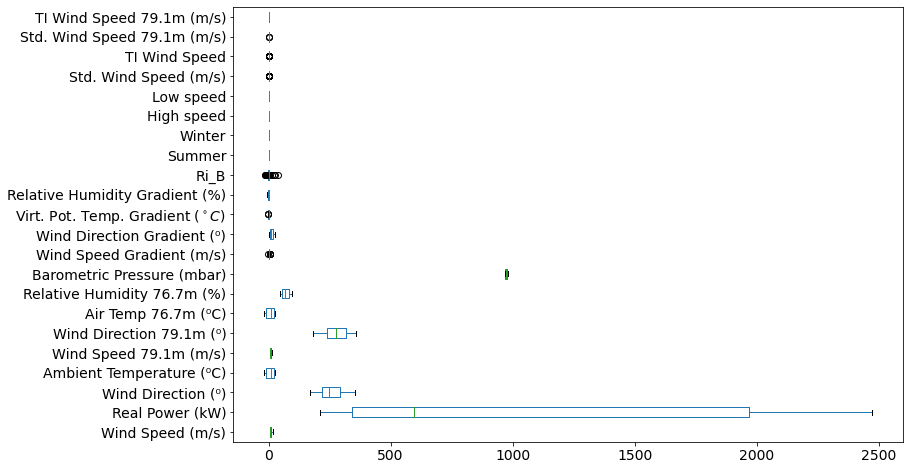

In [651]:
boxplot = df_1min_final.boxplot(grid=False, vert=False,figsize=[12,8],fontsize=14)

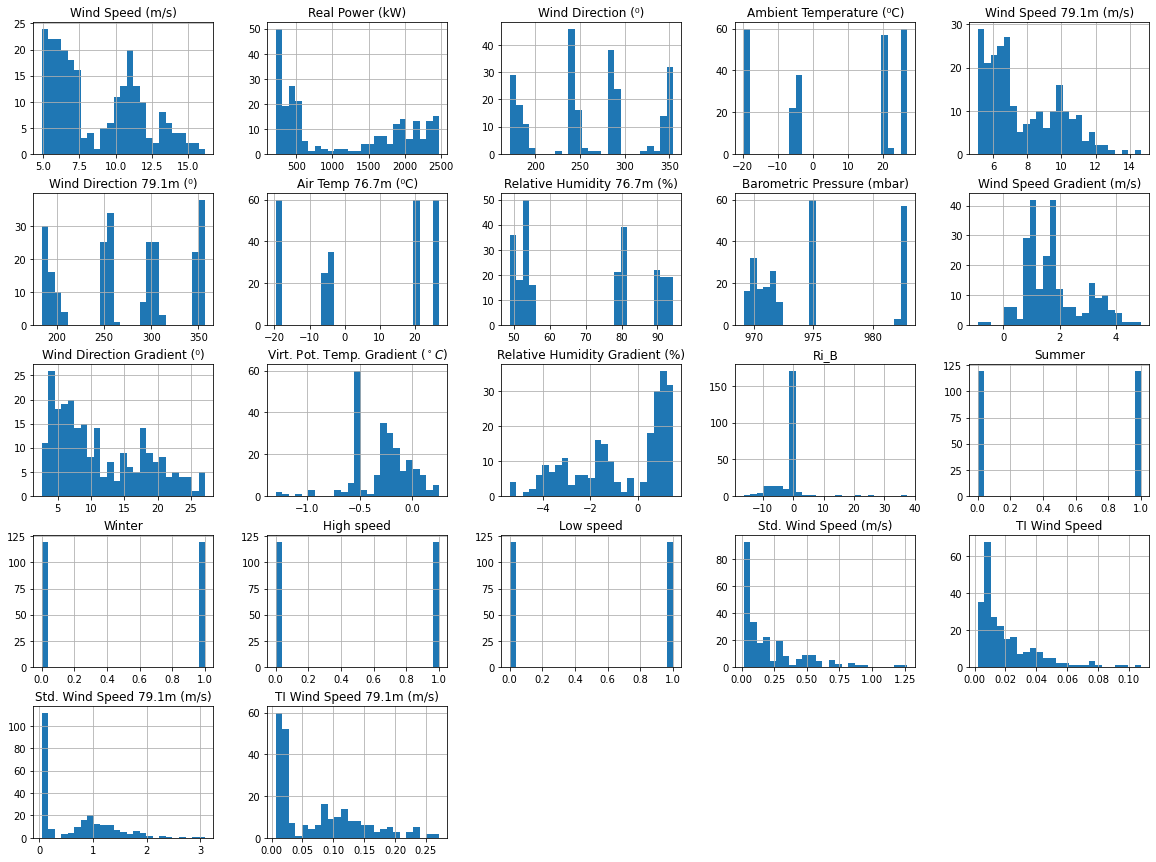

In [652]:
hist=df_1min_final.hist(bins=25,figsize=[20,15])

<font color='teal'>**Pearson correlation heatmap is created for the new Dataframe to check for multi-collinearity.**</font> 

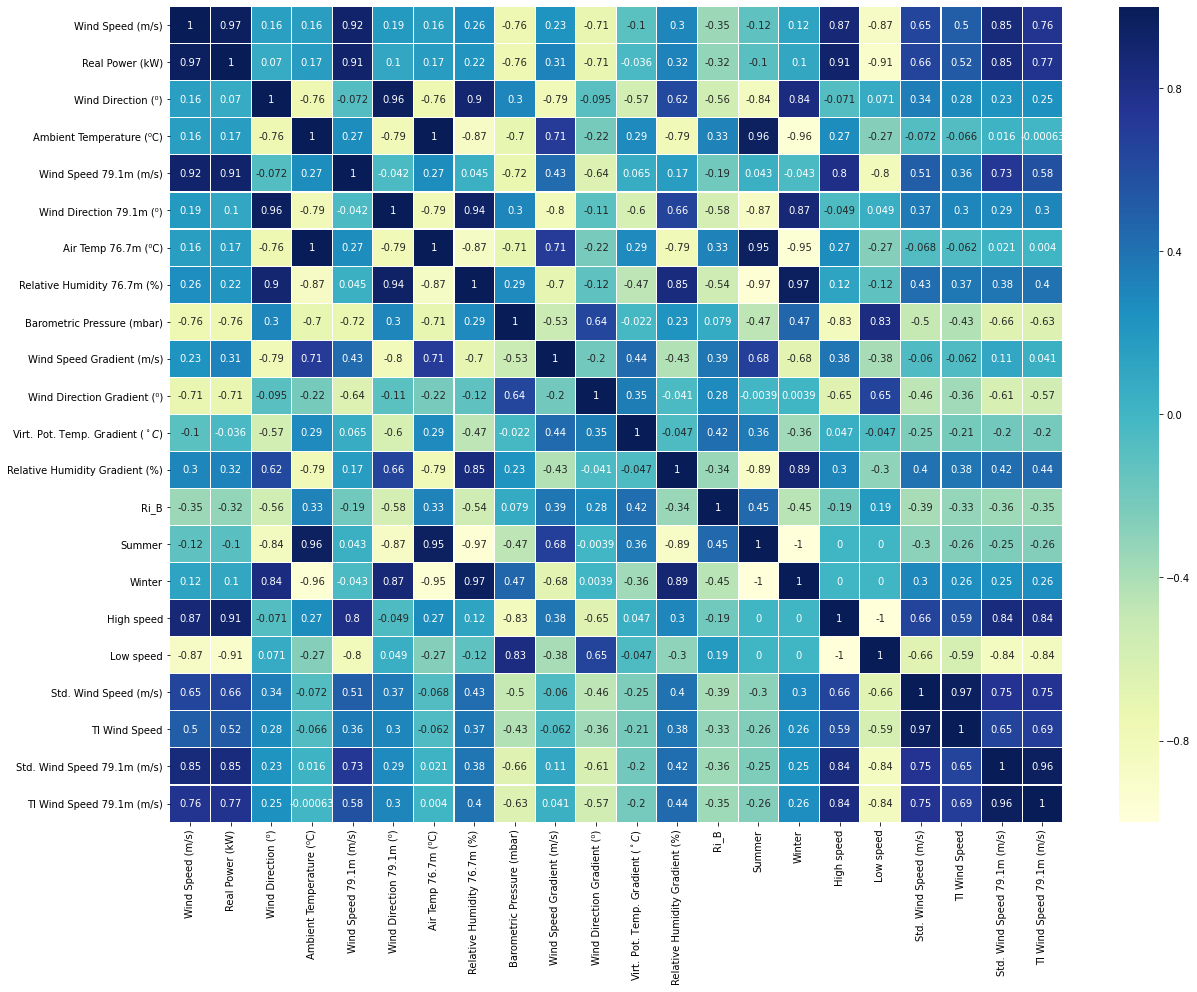

In [653]:
plt.figure(figsize=(20,15))
sns.heatmap(df_1min_final.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

The new Dataframe Pearson heat map shows very few variables with high correlation when compared to original data. The regions of high correlation either correspond to response (Power) vs. explanatory variables (Wind Speed) or mutually exclusive categories such as summer vs. winter. The exception is between standard deviation vs. TI, where the Pearson coefficient is as high as 0.97. These features are kept and may be eliminated later. 

Further, clustering-based feature elimination is not attempted yet, since, features defined above have physical relationship with each other. Again, such elimination will be considered in the subsequent steps.

In [655]:
df_1min_final.to_csv('./data/step3_EDA_output.csv')